In [1]:
import deepxde as dde
import numpy as np

Using backend: tensorflow.compat.v1



Instructions for updating:
non-resource variables are not supported in the long term



In [2]:
geom = dde.geometry.TimeDomain(0, 10)

In [4]:
def ode_system(x, y):
    y1, y2 = y[:, 0:1], y[:, 1:]
    dy1_x = dde.grad.jacobian(y, x, i=0)
    dy2_x = dde.grad.jacobian(y, x, i=1)
    return [dy1_x - y2, dy2_x + y1]

In [5]:
def boundary(x, on_initial):
    return np.isclose(x[0], 0)

In [6]:
ic1 = dde.icbc.IC(geom, np.sin, boundary, component=0)
ic2 = dde.icbc.IC(geom, np.cos, boundary, component=1)

In [8]:
def func(x):
    return np.hstack((np.sin(x), np.cos(x)))

In [9]:
data = dde.data.PDE(geom, ode_system, [ic1, ic2], 35, 2, solution=func, num_test=100)


/Users/junhopark/tensorflow-test/env/lib/python3.8/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+37=37. 
  warnings.warn("The balance properties of Sobol' points require "


In [10]:
layer_size = [1] + [50] * 3 + [2]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

In [11]:
model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])

Compiling model...
Building feed-forward neural network...
'build' took 0.041199 s

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

'compile' took 0.175869 s



/Users/junhopark/tensorflow-test/env/lib/python3.8/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:103: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(
/Users/junhopark/tensorflow-test/env/lib/python3.8/site-packages/keras/legacy_tf_layers/core.py:261: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
2022-05-03 10:49:59.842927: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-03 10:49:59.843243: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name

In [12]:
losshistory, train_state = model.train(epochs=20000)

Initializing variables...
Training model...



2022-05-03 10:50:15.497033: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-03 10:50:15.498052: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-03 10:50:15.531209: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Step      Train loss                                  Test loss                                   Test metric   
0         [3.40e-01, 3.59e-01, 0.00e+00, 1.00e+00]    [3.47e-01, 3.66e-01, 0.00e+00, 1.00e+00]    [1.30e+00]    


2022-05-03 10:50:16.303146: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1000      [8.36e-03, 7.54e-03, 3.21e-08, 3.31e-04]    [9.27e-03, 7.00e-03, 3.21e-08, 3.31e-04]    [7.73e-01]    
2000      [4.01e-03, 3.54e-03, 9.74e-07, 7.84e-05]    [4.58e-03, 3.52e-03, 9.74e-07, 7.84e-05]    [5.10e-01]    
3000      [1.38e-03, 1.91e-03, 1.51e-06, 2.61e-05]    [1.62e-03, 1.65e-03, 1.51e-06, 2.61e-05]    [3.02e-01]    
4000      [1.34e-04, 1.03e-04, 9.54e-08, 6.14e-07]    [1.35e-04, 1.05e-04, 9.54e-08, 6.14e-07]    [5.13e-02]    
5000      [1.11e-03, 1.58e-03, 1.88e-06, 1.09e-04]    [1.16e-03, 1.60e-03, 1.88e-06, 1.09e-04]    [4.94e-02]    
6000      [5.66e-04, 6.86e-04, 6.65e-06, 4.97e-05]    [5.59e-04, 7.24e-04, 6.65e-06, 4.97e-05]    [3.60e-02]    
7000      [1.39e-05, 4.35e-05, 3.45e-06, 5.64e-06]    [1.13e-05, 5.12e-05, 3.45e-06, 5.64e-06]    [7.66e-03]    
8000      [4.22e-06, 5.21e-06, 1.89e-07, 8.42e-08]    [5.16e-06, 7.95e-06, 1.89e-07, 8.42e-08]    [3.51e-03]    
9000      [2.32e-06, 3.43e-06, 1.85e-09, 1.69e-09]    [2.91e-06, 5.73e-06, 1.85e-09, 1.69e-09]  

Saving loss history to /Users/junhopark/My Drive/Transformer_MPC/03_HybridModel/loss.dat ...
Saving training data to /Users/junhopark/My Drive/Transformer_MPC/03_HybridModel/train.dat ...
Saving test data to /Users/junhopark/My Drive/Transformer_MPC/03_HybridModel/test.dat ...


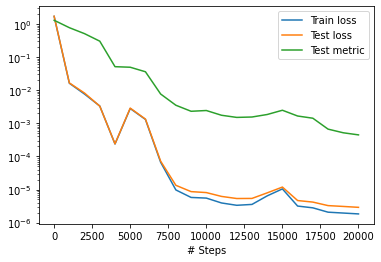

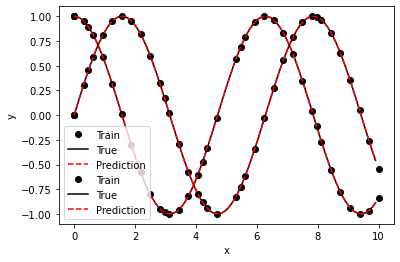

In [13]:
dde.saveplot(losshistory, train_state, issave=True, isplot=True)
